# IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback

from sklearn.metrics import confusion_matrix, classification_report

# IMPORT DATASET

In [2]:
dir = 'E:/SEM9/SKRIPSI/CABAI/CODE/Chili.v1i.folder/'

# membuat sub directory untuk data train, val, and test
train_w = os.path.join(dir, 'dataset/train/whitefly')
train_y = os.path.join(dir, 'dataset/train/yellowish')
train_s = os.path.join(dir, 'dataset/train/leaf spot')
train_h = os.path.join(dir, 'dataset/train/healthy')
train_c = os.path.join(dir, 'dataset/train/leaf curl')
train_p = os.path.join(dir, 'dataset/train/powdery mildew')

val_w = os.path.join(dir, 'dataset/valid/whitefly')
val_y = os.path.join(dir, 'dataset/valid/yellowish')
val_s = os.path.join(dir, 'dataset/valid/leaf spot')
val_h = os.path.join(dir, 'dataset/valid/healthy')
val_c = os.path.join(dir, 'dataset/valid/leaf curl')
val_p = os.path.join(dir, 'dataset/valid/powdery mildew')

test_w = os.path.join(dir, 'dataset/test/whitefly')
test_y = os.path.join(dir, 'dataset/test/yellowish')
test_s = os.path.join(dir, 'dataset/test/leaf spot')
test_h = os.path.join(dir, 'dataset/test/healthy')
test_c = os.path.join(dir, 'dataset/test/leaf curl')
test_p = os.path.join(dir, 'dataset/test/powdery mildew')

# membuat list untuk train_dir, val_dir, and test_dir
train_dir = [train_w, train_y, train_s, train_h, train_c, train_p]
val_dir = [val_w, val_y, val_s, val_h, val_c, val_p]
test_dir = [test_w, test_y, test_s, test_h, test_c, test_p]

dir2 = [train_dir, val_dir, test_dir]

# DATA UNDERSTANDING

In [3]:
train_dir = os.path.join(dir, 'dataset/train')
val_dir = os.path.join(dir, 'dataset/valid')
test_dir = os.path.join(dir, 'dataset/test')

# List kelas (subfolder) dalam setiap direktori
classes = os.listdir(train_dir)

# Inisialisasi variabel untuk menyimpan nilai maksimum dan minimum
format_data = ''
max_size_data = (0, 0)
min_size_data = (float('inf'), float('inf'))
channels = 0

for class_name in classes:
    class_dir_train = os.path.join(train_dir, class_name)
    class_dir_val = os.path.join(val_dir, class_name)
    class_dir_test = os.path.join(test_dir, class_name)

    # Menghitung dan menampilkan informasi tentang setiap gambar
    for folder in [class_dir_train, class_dir_val, class_dir_test]:
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            format_data = img.format
            size_data = img.size
            channels = len(img.getbands())

            if size_data > max_size_data:
                max_size_data = size_data
            if size_data < min_size_data:
                min_size_data = size_data

# Menampilkan nilai maksimum dan minimum
print(f'Format Data: {format_data}')
print(f'Max Ukuran Data: {max_size_data}')
print(f'Min Ukuran Data: {min_size_data}')
print(f'Ukuran Channel: {channels}')

Format Data: JPEG
Max Ukuran Data: (640, 640)
Min Ukuran Data: (640, 640)
Ukuran Channel: 3


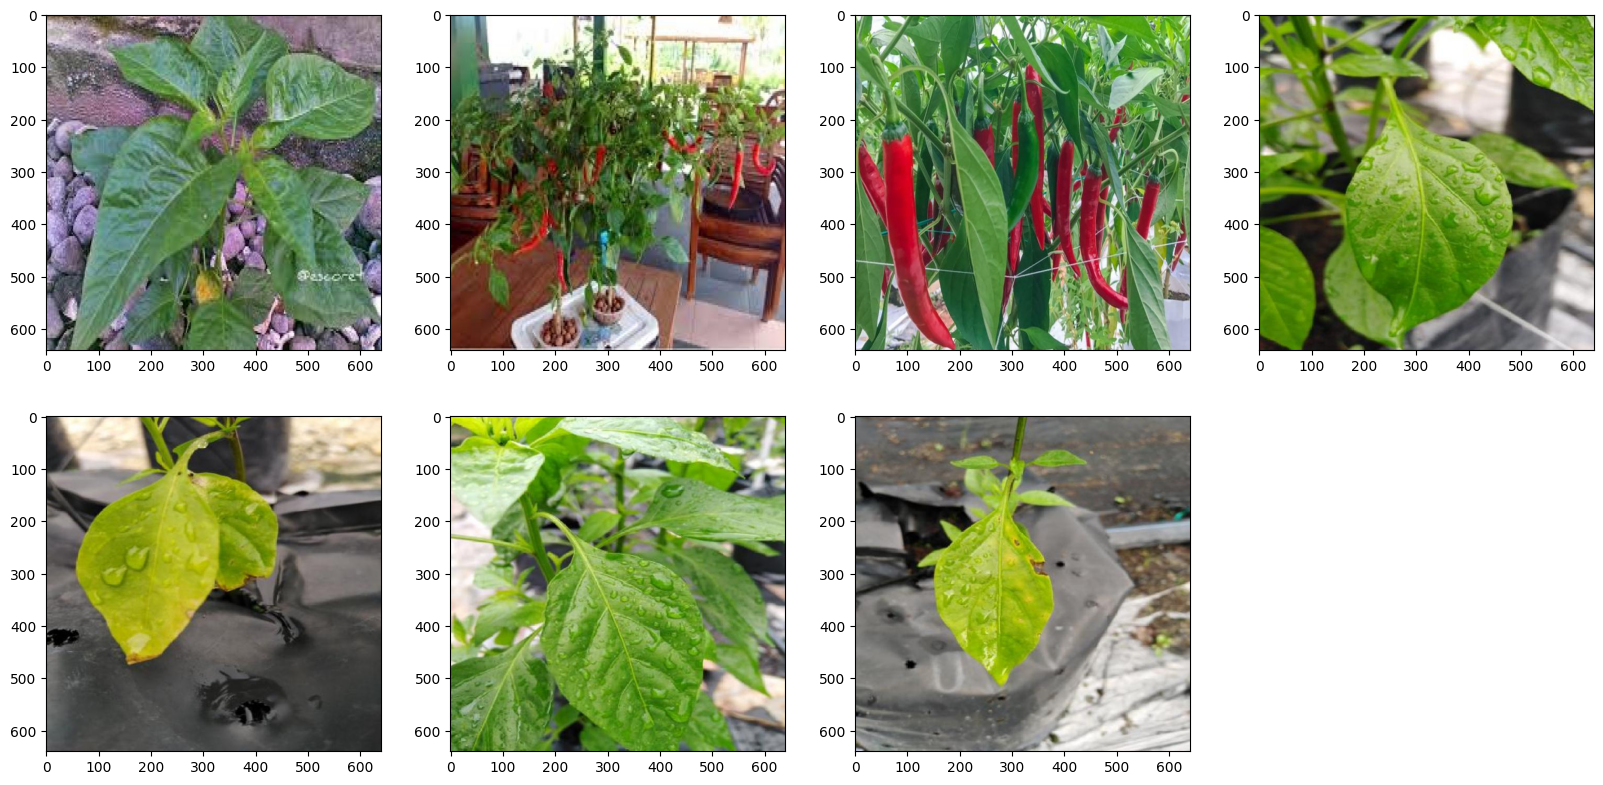

In [4]:
#isi data training
images=os.listdir(train_dir + '/' + 'healthy')
plt.figure(figsize=(20,20))
for i in range(7):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    img = mpimg.imread(os.path.join(train_dir + '/' + 'healthy', img))
    fig.imshow(img)

# DATA PREPARATION

In [5]:
IMG_SIZE = 160
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [6]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

val_test_gen = ImageDataGenerator(rescale=1./255)


In [7]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    shuffle=True
)

val_data = val_test_gen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    shuffle=True
)

test_data = val_test_gen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    shuffle=False
)

Found 800 images belonging to 6 classes.
Found 232 images belonging to 6 classes.
Found 115 images belonging to 6 classes.


# MODELLING

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 158, 158, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 79, 79, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 77, 77, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 586,406 (2.24 MB)

 Trainable params: 586,054 (2.24 MB)

 Non-trainable params: 352 (1.38 KB)

In [9]:
optimizer = RMSprop(learning_rate= 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [10]:
history = model.fit(
            train_data,
            validation_data=val_data,
            epochs=50)

Epoch 1/50


c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.2434 - loss: 4.2522 - val_accuracy: 0.1724 - val_loss: 3.0124
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.3452 - loss: 1.7113 - val_accuracy: 0.1638 - val_loss: 5.1551
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.3955 - loss: 1.5271 - val_accuracy: 0.1638 - val_loss: 7.9127
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - accuracy: 0.4423 - loss: 1.3995 - val_accuracy: 0.1638 - val_loss: 8.9842
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - accuracy: 0.4164 - loss: 1.4099 - val_accuracy: 0.1293 - val_loss: 8.1261
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 349ms/step - accuracy: 0.4997 - loss: 1.3415 - val_accuracy: 0.1250 - val_loss: 9.4029
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - accuracy: 0.5127 - loss: 1.3254 - val_accuracy: 0.1466 - val_loss: 9.0486
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 351ms/step - accuracy: 0.4925 - loss: 1.2861 - val_accuracy: 0.1940 -

# EVALUASI

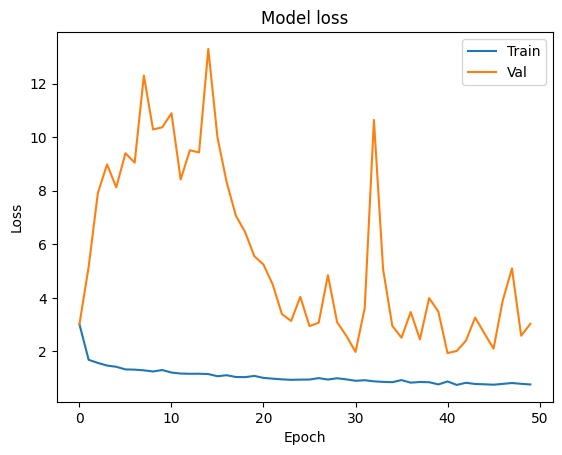

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

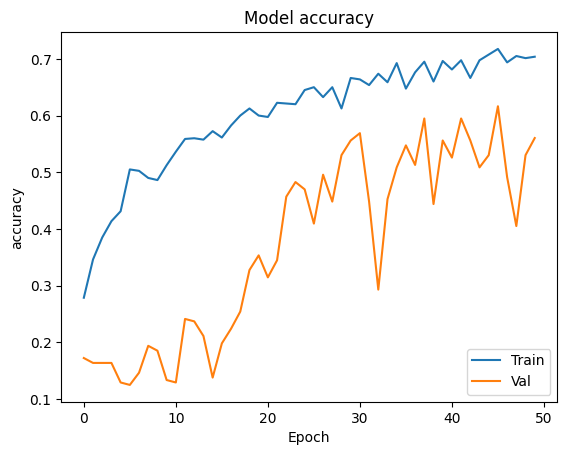

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [13]:
# Prediksi pada data uji
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [14]:
# Mendapatkan label sebenarnya
y_true = test_data.classes

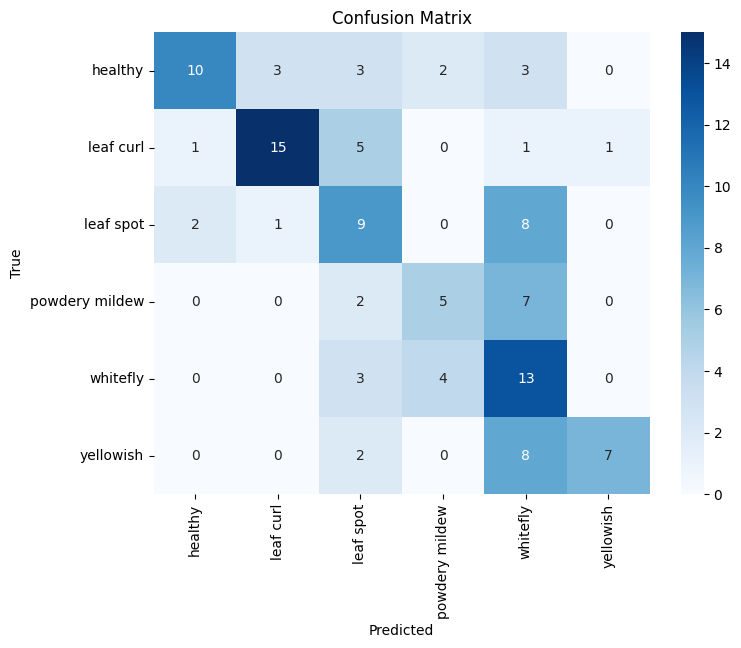

In [15]:
# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Menampilkan confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(),
            yticklabels=train_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.77      0.48      0.59        21
           1       0.79      0.65      0.71        23
           2       0.38      0.45      0.41        20
           3       0.45      0.36      0.40        14
           4       0.33      0.65      0.43        20
           5       0.88      0.41      0.56        17

    accuracy                           0.51       115
   macro avg       0.60      0.50      0.52       115
weighted avg       0.60      0.51      0.53       115



In [17]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(train_data)
print('Training accuracy:', train_acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.5046 - loss: 2.7478
Training accuracy: 0.5174999833106995
